# Lecture 3

In this lecture we move onto non-homogeneous second-order ordinary differentials. We want to solve equations of the form

$$
a \frac{d^{2}y}{dx^{2}} + b \frac{dy}{dx} + c y = f(x)
$$

where $a$, $b$ and $c$ are real constants. We've seem previously that for the case $b^{2} \ne 4ac$ and
$f(x) = 0$, the general solution to the above equation is 

$$
y = A_{1} e^{\lambda_{1}} + A_{2}e^{\lambda_{2}}
$$

where $\lambda$ are the roots to the characteristic equation $a\lambda^{2} + b \lambda + c = 0$. For the case that $b^{2} = 4ac$ (repeated roots), the general solution is of the form

$$
y =(A_{1} + A_{2} x) e^{\lambda x}
$$

Recall that the constants $A_{1}$ and $A_{2}$ are determined from the boundary conditions.

### Initialising SymPy

To solve equations using SymPy, we again need to import SymPy, and we;ll call `init_printing()` to get nicely typeset equations:

In [1]:
from sympy import *

# This initialises pretty printing
init_printing()
from IPython.display import display

# This command makes plots appear inside the browser window
%matplotlib inline

## Mass-spring-damper system

The differential equation that governs a single degree-of-freedom mass-spring-damper system, with a forcing term $f(t)$, is

$$
m \frac{d^{2}y}{dt^{2}} + \lambda \frac{dy}{dt} + ky = f(t)
$$

To solve this problem using SymPy, we first define the symbols $t$ (time), $m$ (mass), $\lambda$ (damper coefficient) and $k$ (spring stiffness), and the function $y$ (displacement): 

In [2]:
t, m, lmbda, k = symbols("t m lambda k")
y = Function("y")
f = Function("f")

Next, we define the differential equation, and print it to the screen:

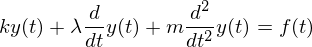

In [3]:
eqn = Eq(m*Derivative(y(t), t, t) + lmbda*Derivative(y(t), t) + k*y(t), f(t))
display(eqn)

## Classifying the ODE

Checking the order of the ODE:

In [4]:
print("This order of the ODE is: {}".format(ode_order(eqn, y(t))))

This order of the ODE is: 2


As expected, it is second order. Now classifying the ODE:

In [5]:
print("Properties of the ODE are: {}".format(classify_ode(eqn)))

Properties of the ODE are: ('nth_linear_constant_coeff_variation_of_parameters', 'nth_linear_constant_coeff_variation_of_parameters_Integral')


## Solving the ODE

We can now try to solve the ODE symbolically, but without defining $f(t)$ the result will be umanageble. Sympy will return a solution but it will too complicated to interpret.

We will therefore specify some of the parameters in the equation:

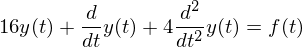

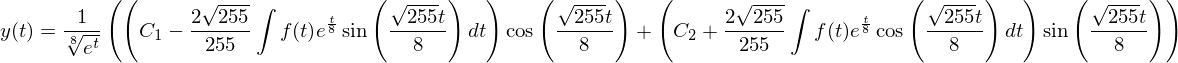

In [6]:
m0, lmbda0, k0 = 4, 1, 16
eqn1 = eqn.subs(m, m0).subs(k, k0).subs(lmbda, lmbda0)
display(eqn1)

dsolve(eqn1)

The solution is looking more manageable, but we still haven't specified $f(t)$. Setting $f(t) = 2$ and then solving,

ODE with f(t) = 2


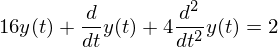

Solution to ODE:


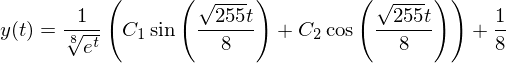

In [7]:
eqn1 = eqn1.subs(f(t), 2)
print("ODE with f(t) = 2")
display(eqn1)

ys = dsolve(eqn1, y(t))
print("Solution to ODE:")
display(ys)

The solution is now looking tractable. If we set $C_{1} = C_{2} = 1$, we can plot the solution. 

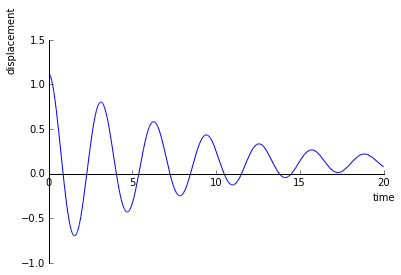

In [8]:
ys = ys.subs('C1', 0).subs('C2', 1)
plot(ys.args[1], (t, 0.0, 20.0), xlabel="time", ylabel="displacement");

We can see the that the solution is a decaying sinusoidal function.

### Exercise: 

Try changing the values for $m$, $\lambda$ and $k$ to investigate their influence in the response. You can try negative values, but only positive values are physically possible.

### Exercise:

Try changing $f(t)$ to explore the response for different forcing functions.

### Example: resonance

An undamped system ($\lambda = 0$) changes character when the forcing term is sinusoidal at the natural frequency of the system. The corresponds to the case of the forcing term having the same form as the solution to the homogeneous problem.

The natural frequency $\omega_{n} = \sqrt{k/m}$. Setting $f(t) = \sin( \omega x)$


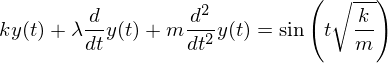

In [9]:
# Define natural frequency
omega = Symbol("omega")
omega = sqrt(k/m)

# Set f(t) = sin(\omega t)
eqn1 = eqn.subs(f(t), sin(omega*t))
display(eqn1)

We now set values for $m$, $\lambda$ and $k$ (we'll set $\lambda = 0$ which corresponds to an undamped system):

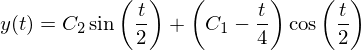

In [10]:
# Set numerical values for m, lambda and k
m0, lmbda0, k0 = 4, 0, 1
eqn1 = eqn1.subs(m, m0).subs(k, k0).subs(lmbda, lmbda0)

# Solve ODE
y = dsolve(eqn1)
display(y)

Note the presence of $t$ in front of the cosine. This implies that the solution will grow linearly in time. We can see this by plotting the solution:

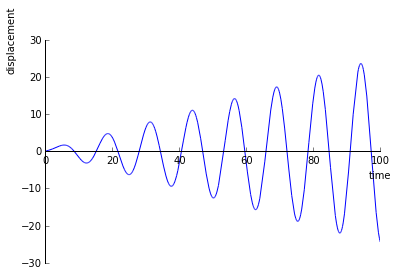

In [11]:
y = y.subs('C1', 0).subs('C2', 1)
plot(y.args[1], (t, 0.0, 100.0), xlabel="time", ylabel="displacement");

We observe that the solution grows in time - this is a feature of resonance.